In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./csv/housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.shape

(20640, 10)

In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

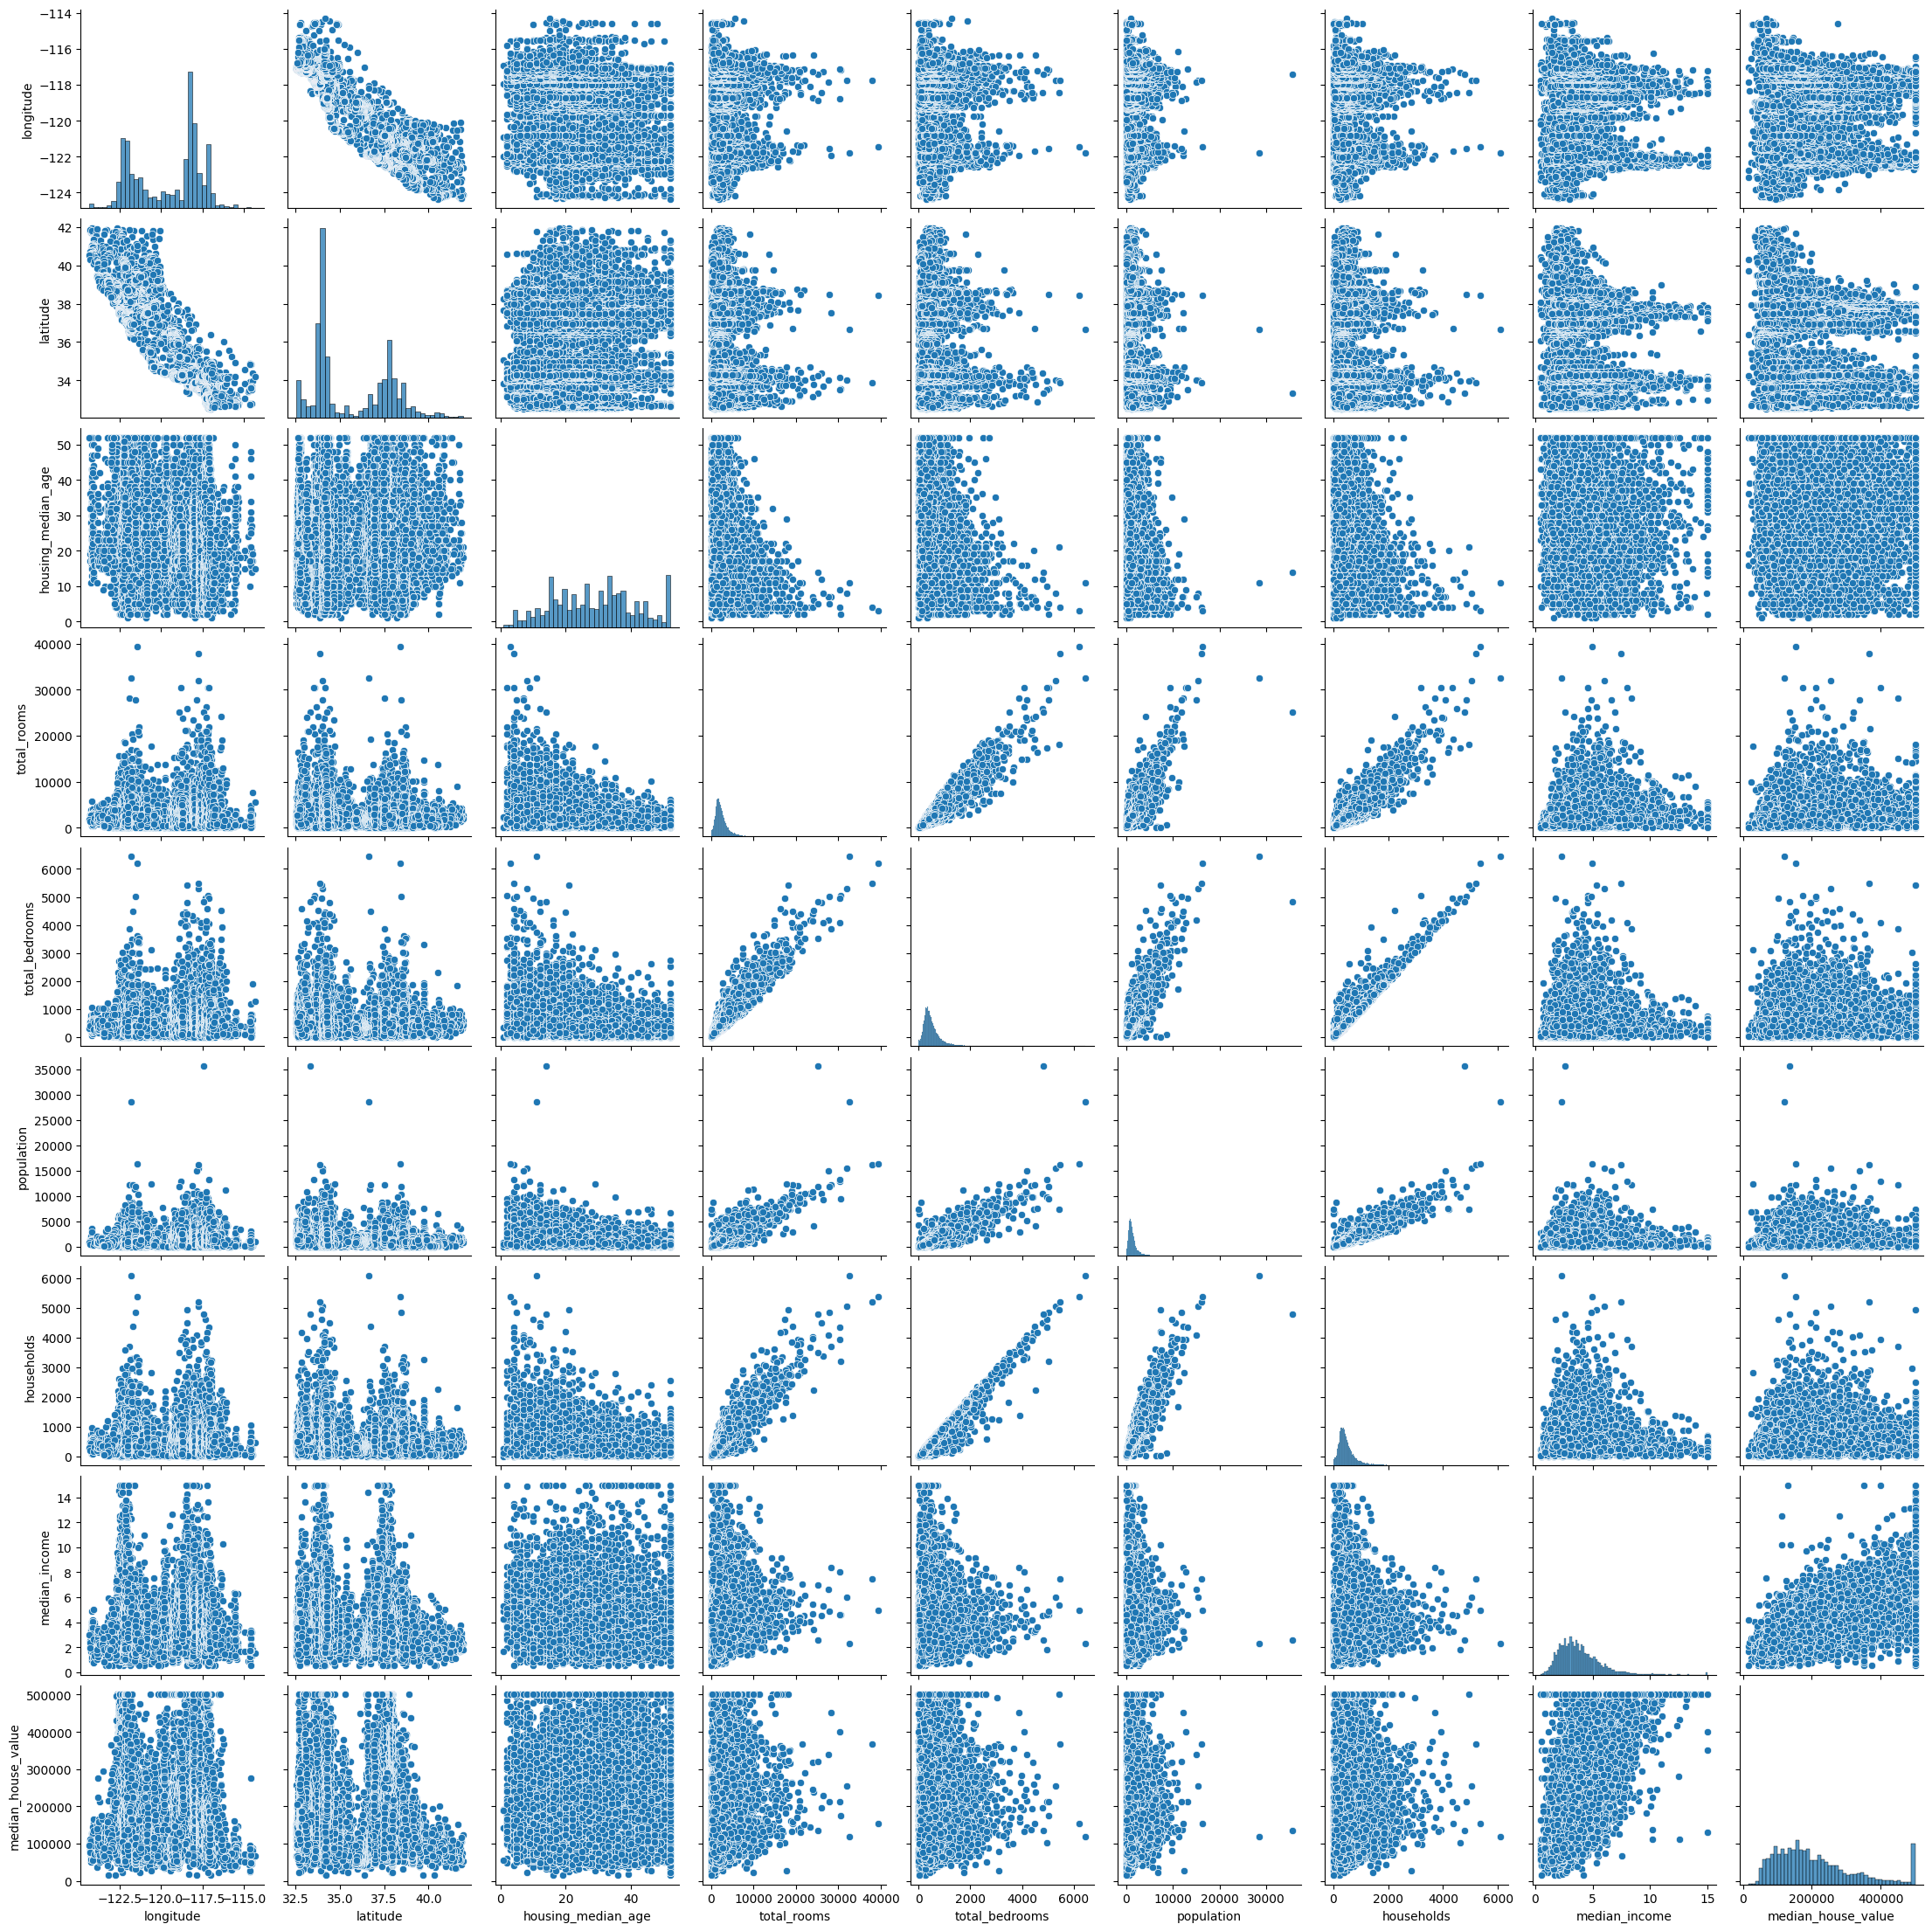

In [8]:
df2=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]
sns.pairplot(data=df2)

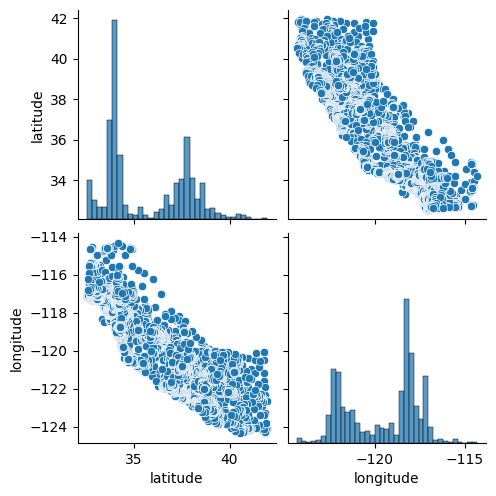

In [9]:
df2 = df[['latitude','longitude']]
sns.pairplot(data=df2)

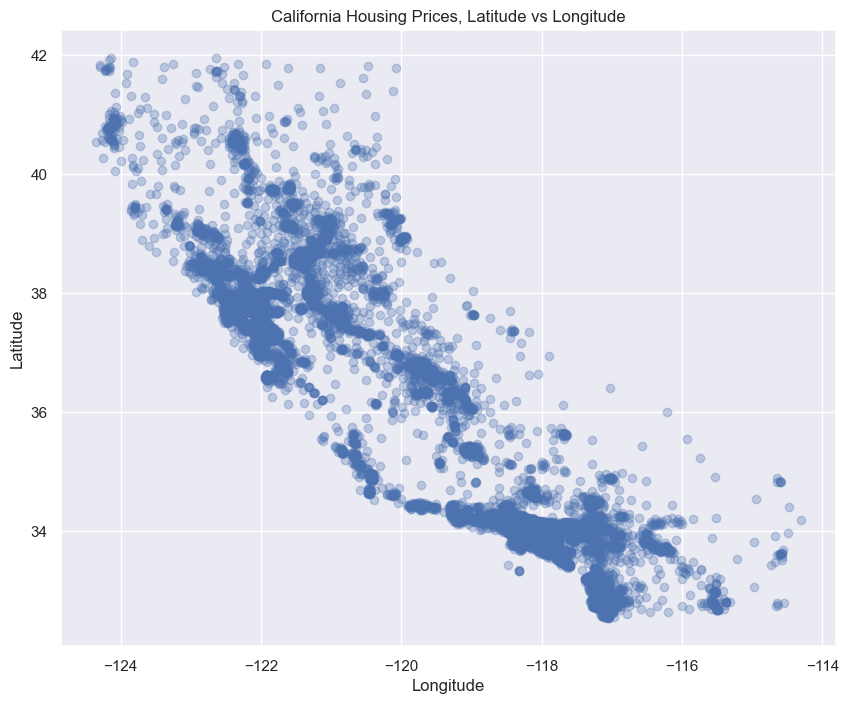

In [10]:
sns.set()
plt.figure(figsize=(10, 8))
plt.scatter('longitude', 'latitude',data=df, alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices, Latitude vs Longitude')
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

<Figure size 1000x700 with 0 Axes>

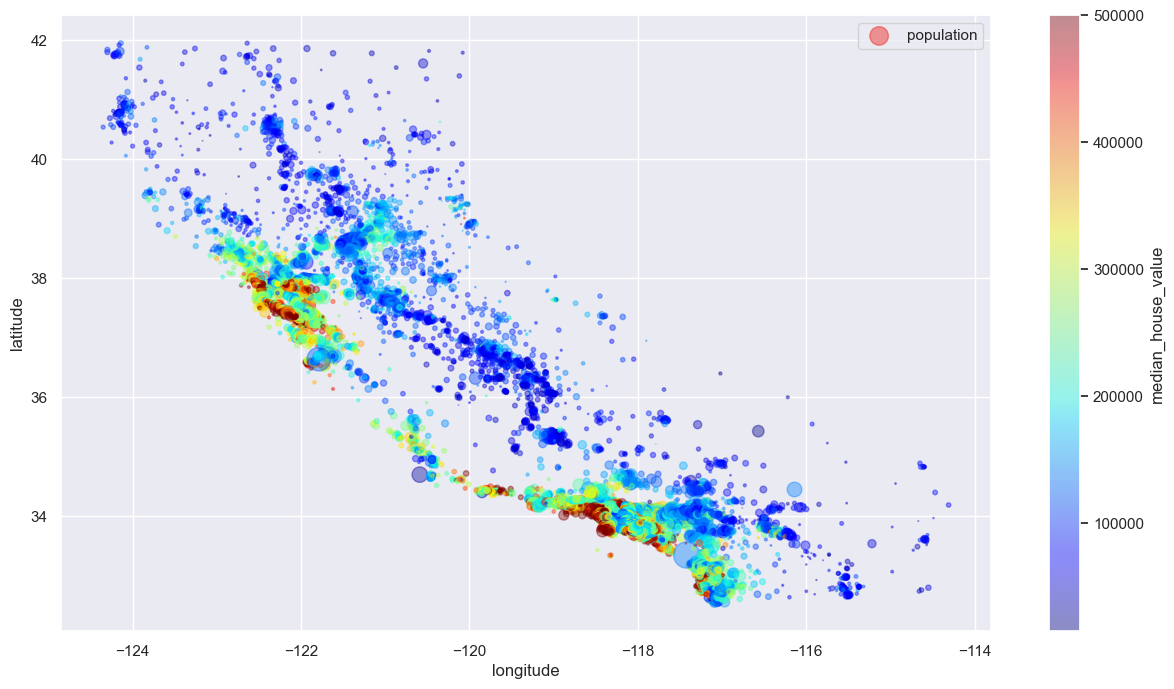

In [11]:
plt.figure(figsize=(10,7))
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(15,8),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
(round(df.isna().sum()*100/df.shape[0], 2)).astype(str) + '%'

longitude             0.0%
latitude              0.0%
housing_median_age    0.0%
total_rooms           0.0%
total_bedrooms        1.0%
population            0.0%
households            0.0%
median_income         0.0%
median_house_value    0.0%
ocean_proximity       0.0%
dtype: object

In [14]:
df_missing = df.isna().melt(value_name='missing')

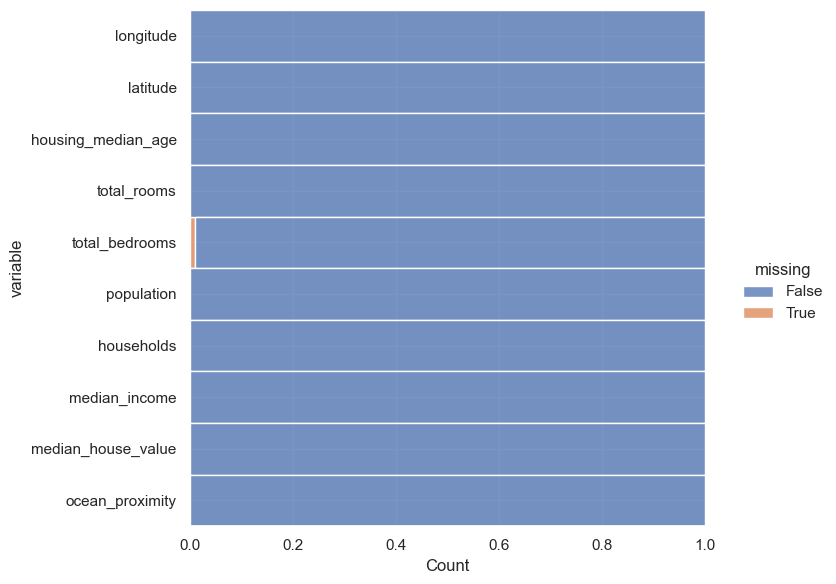

In [15]:
sns.displot(data=df_missing, y='variable', hue='missing', multiple="fill", height=6, aspect=1.25)

In [16]:
# df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)
df['total_bedrooms'] = df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()))


In [17]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

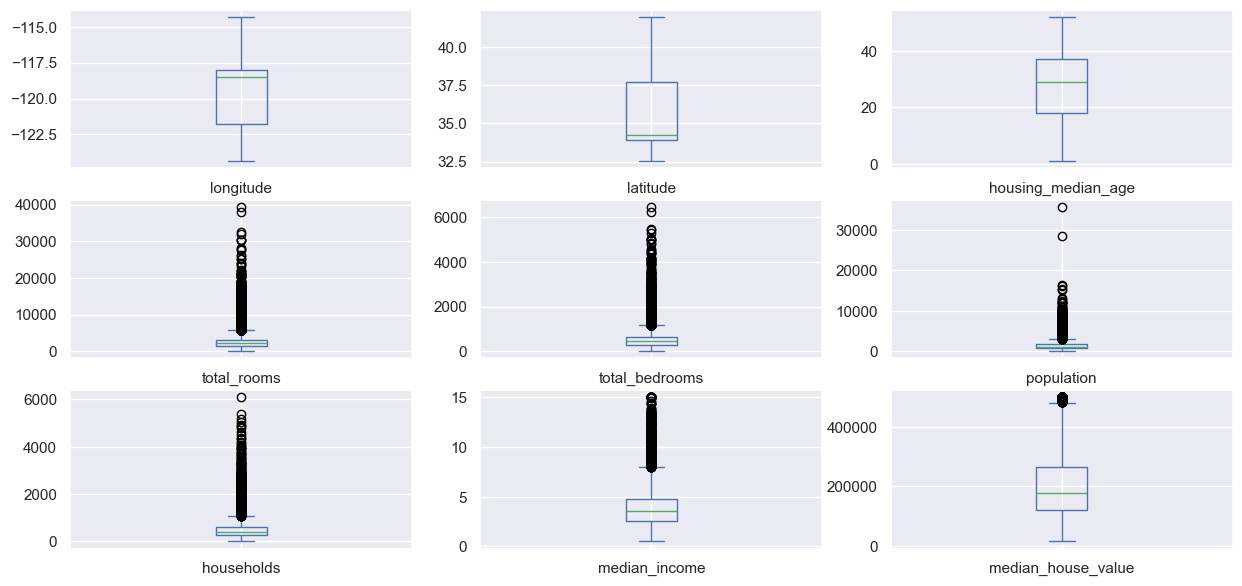

In [20]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 7))
plt.show()

In [21]:
columns=['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for col in columns:
    df=df[df[col]<df[col].quantile(0.9)]

In [22]:
df.shape

(12166, 10)

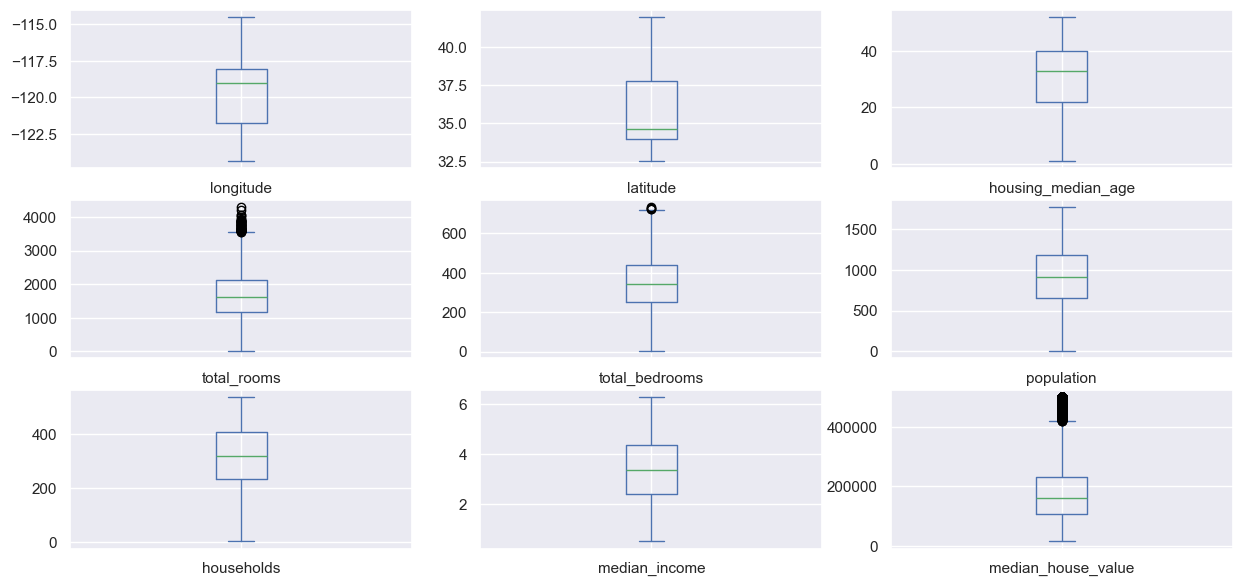

In [23]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 7))
plt.show()

In [24]:
ocean_values = df['ocean_proximity'].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     4979
INLAND        4333
NEAR OCEAN    1492
NEAR BAY      1357
ISLAND           5
Name: count, dtype: int64

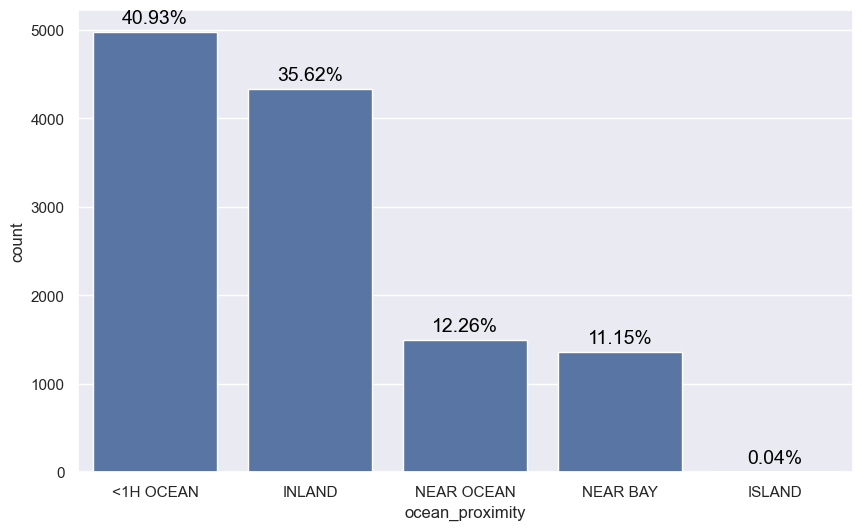

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ocean_proximity', order=ocean_values.index)

for i in range(ocean_values.shape[0]):
    count=ocean_values.values[i]
    strt='{:0.2f}%'.format(100*count/df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

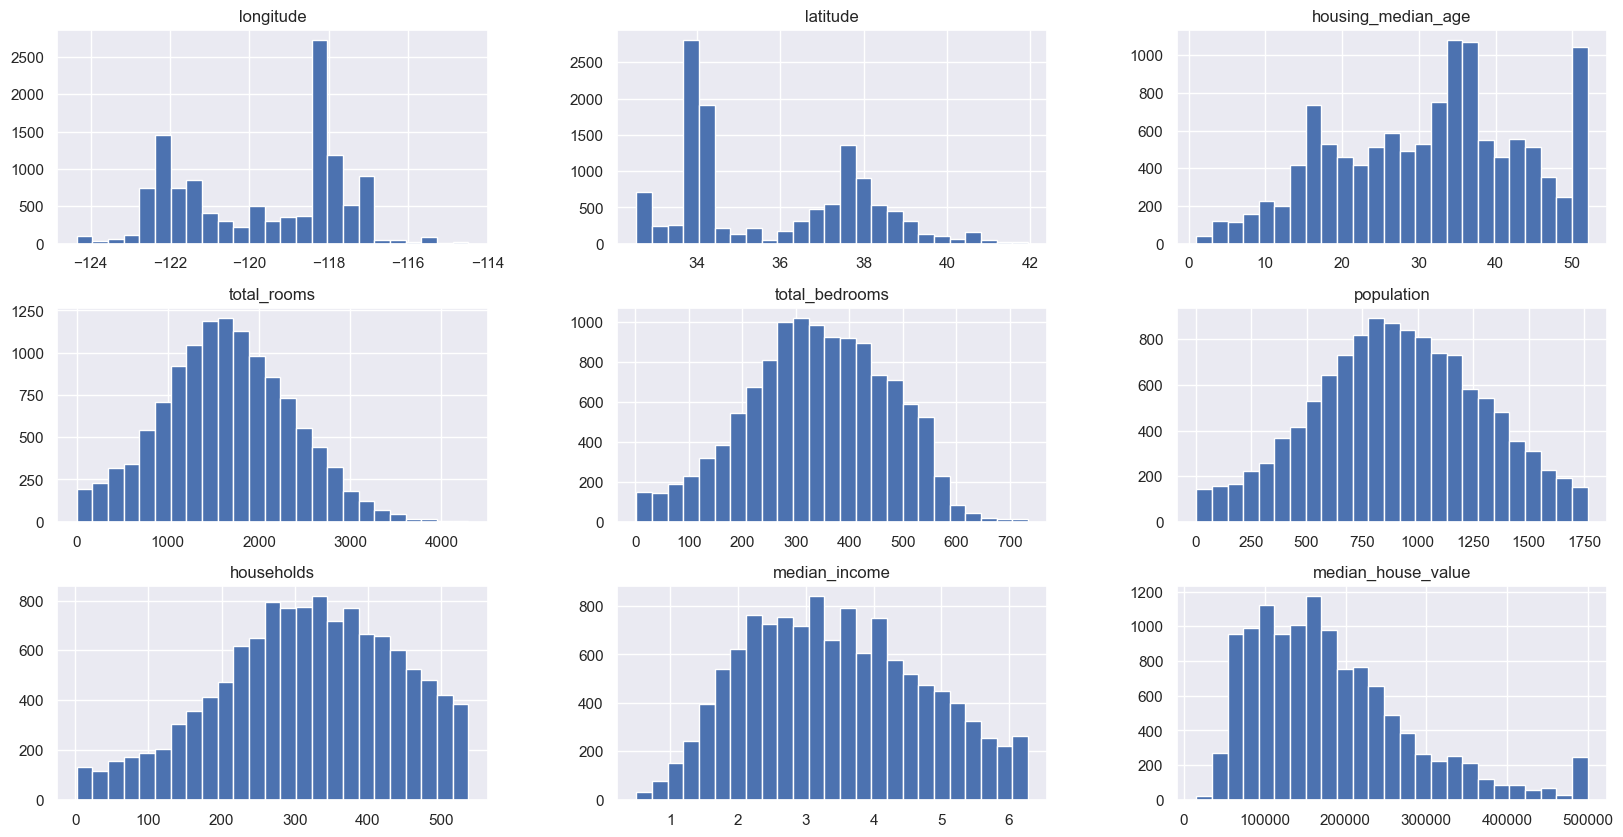

In [26]:
df.hist(figsize=(20, 10), bins=25)

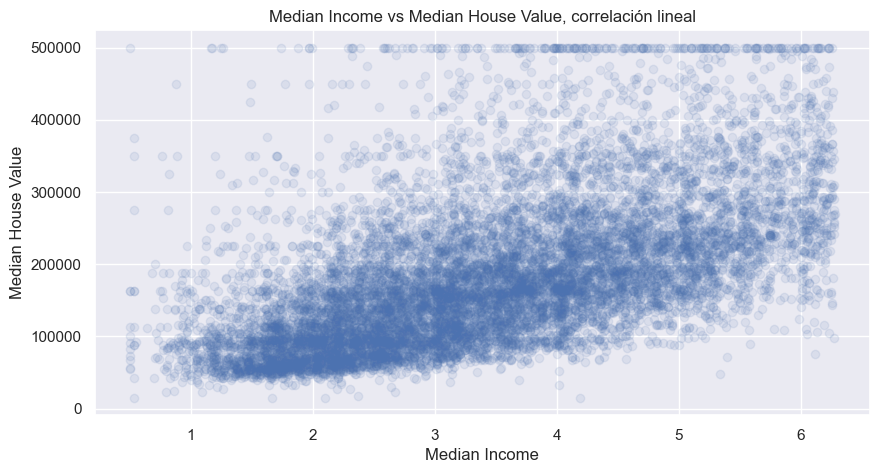

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value, correlación lineal')
plt.show()

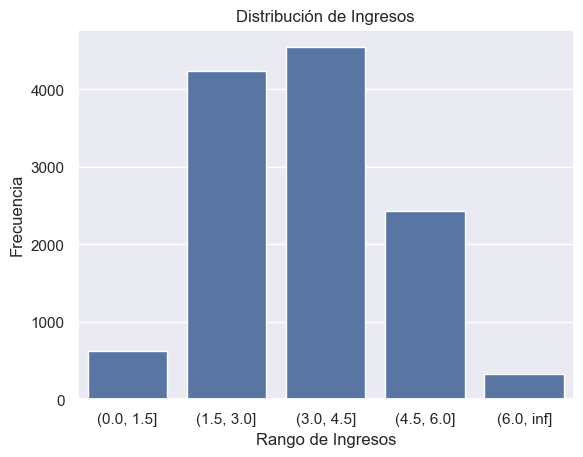

In [28]:
income_bins = pd.cut(df['median_income'], bins=[0, 1.5, 3, 4.5, 6,np.inf])
sns.countplot(x=income_bins)

plt.xlabel('Rango de Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.show()

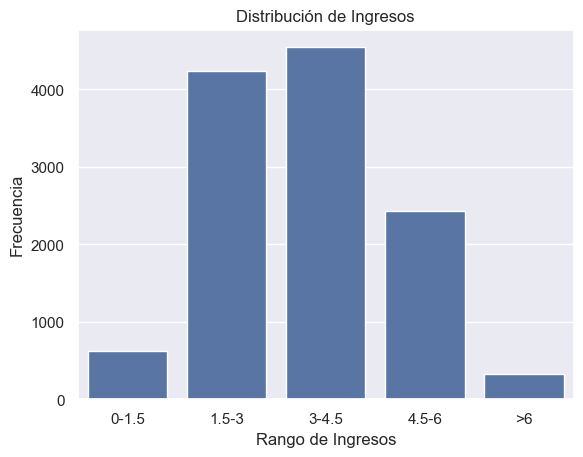

In [29]:
income_bins = pd.cut(df['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '>6'])
sns.countplot(x=income_bins)
plt.xlabel('Rango de Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.show()

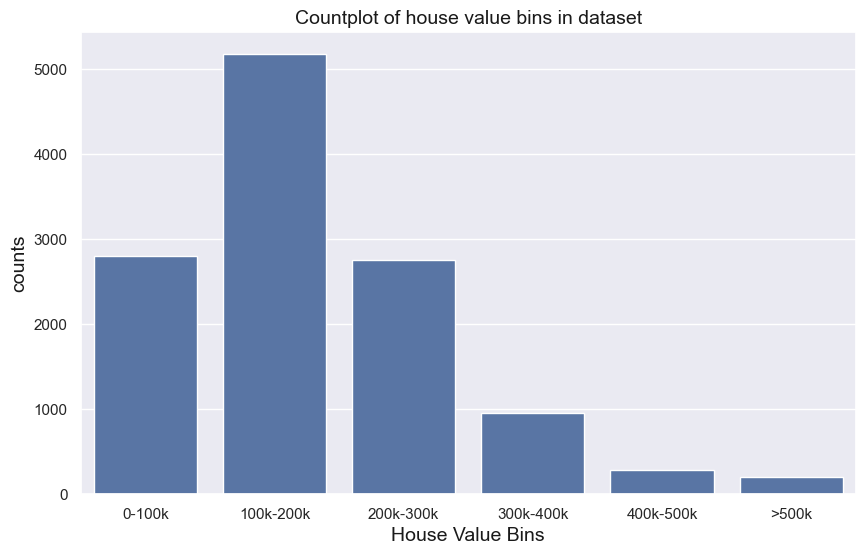

In [30]:
house_value_bins = pd.cut(df['median_house_value'], bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '>500k'])

plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('counts', fontsize=14, c='k')
plt.title('Countplot of house value bins in dataset', fontsize=14,c='k')
plt.show()

In [31]:
target = 'median_house_value'

In [32]:
df = df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']]

X = df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']]
y = df[target]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8516, 6)
(3650, 6)
(8516,)
(3650,)


In [35]:
X_train.describe()

housing_median_age  total_rooms  total_bedrooms   population  \
count         8516.000000  8516.000000     8516.000000  8516.000000   
mean            31.491310  1644.846407      339.128934   908.318342   
std             12.175659   710.640830      133.360206   380.258879   
min              1.000000     2.000000        2.000000     3.000000   
25%             22.000000  1165.000000      251.000000   648.000000   
50%             33.000000  1621.000000      341.500000   906.500000   
75%             40.000000  2121.000000      438.000000  1178.000000   
max             52.000000  4293.000000      734.000000  1766.000000   

       households  median_income  
count  8516.00000    8516.000000  
mean    314.21853       3.439528  
std     122.77461       1.291813  
min       2.00000       0.499900  
25%     233.75000       2.412950  
50%     320.00000       3.348000  
75%     408.00000       4.389700  
max     537.00000       6.277800

In [36]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)
X=minmax_scaler.transform(X)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8516, 6)
(3650, 6)
(8516,)
(3650,)


### Regresión Lineal Múltiple

In [38]:
from sklearn import linear_model

reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
reg.score(X_train, y_train)

0.4630767924749213

In [40]:
reg.intercept_

np.float64(-21957.57934953383)

In [41]:
reg.coef_

array([  78859.09638583, -252416.3181715 ,  176025.89777962,
       -191812.41090221,  194521.56388687,  309763.10311355])

In [42]:
y_predict = reg.predict(X_test)

In [43]:
y_predict

array([217692.80098215, 126236.55665006, 127099.87327359, ...,
       295260.41509319, 205002.08008718, 249350.74665431], shape=(3650,))

In [44]:
y_test.values

array([277300., 130100., 118100., ..., 261900., 169700., 313900.],
      shape=(3650,))

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

reg_score=r2_score(y_test, y_predict)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.4760729024785423
Mean Squared Error     : 5013437346.034269
Mean Absolute Error    : 52228.720042406574
Root Mean Squared Error: 70805.63075091041


### Árbol de Decisión

In [49]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [60]:
tree_mod = DecisionTreeRegressor(max_depth=3)
tree_mod.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [61]:
preds_tree = tree_mod.predict(X_test)

In [56]:
reg_score=r2_score(y_test, preds_tree)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds_tree)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds_tree)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.38349739392039706
Mean Squared Error     : 5899288667.962721
Mean Absolute Error    : 56858.253687828794
Root Mean Squared Error: 76806.82696194864


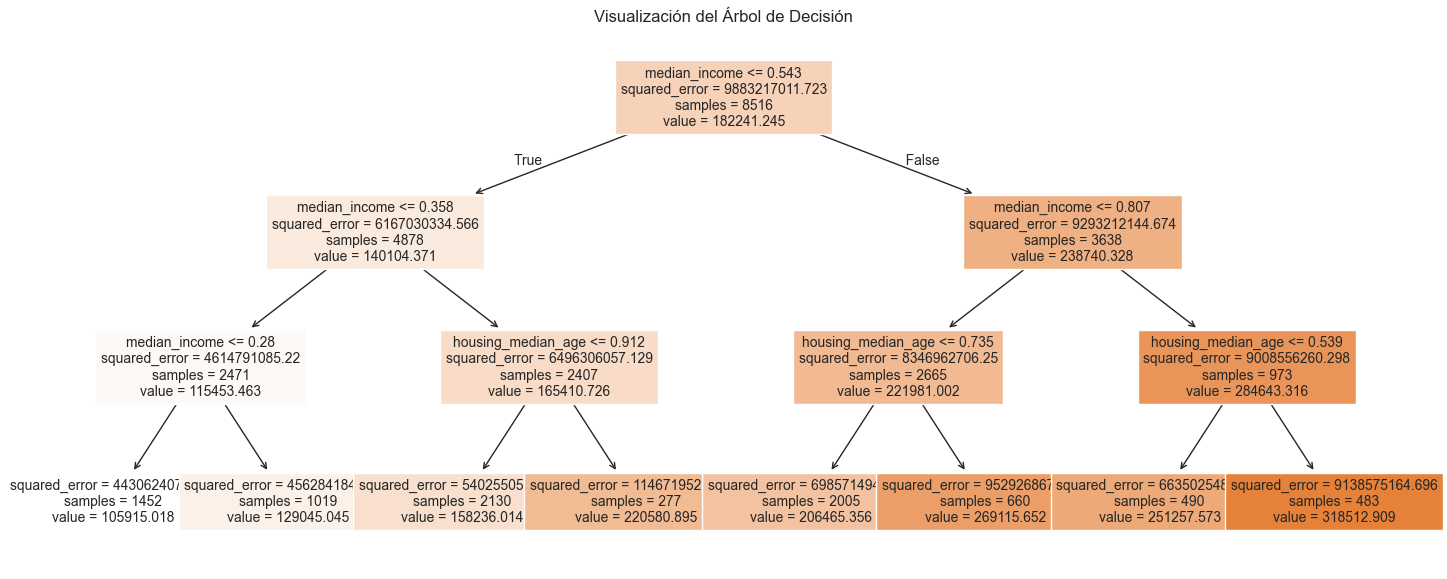

In [62]:
plt.figure(figsize=(18, 7))
plot_tree(tree_mod, filled=True, feature_names=['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income'], fontsize=10,class_names=True)
plt.title('Visualización del Árbol de Decisión')
plt.show()

In [63]:
tree_mod = DecisionTreeRegressor(max_depth=2)
tree_mod.fit(X_train, y_train)
preds_tree = tree_mod.predict(X_test)

reg_score=r2_score(y_test, preds_tree)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds_tree)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds_tree)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.32358223325760627
Mean Squared Error     : 6472614433.095868
Mean Absolute Error    : 59897.38501268392
Root Mean Squared Error: 80452.56014009666


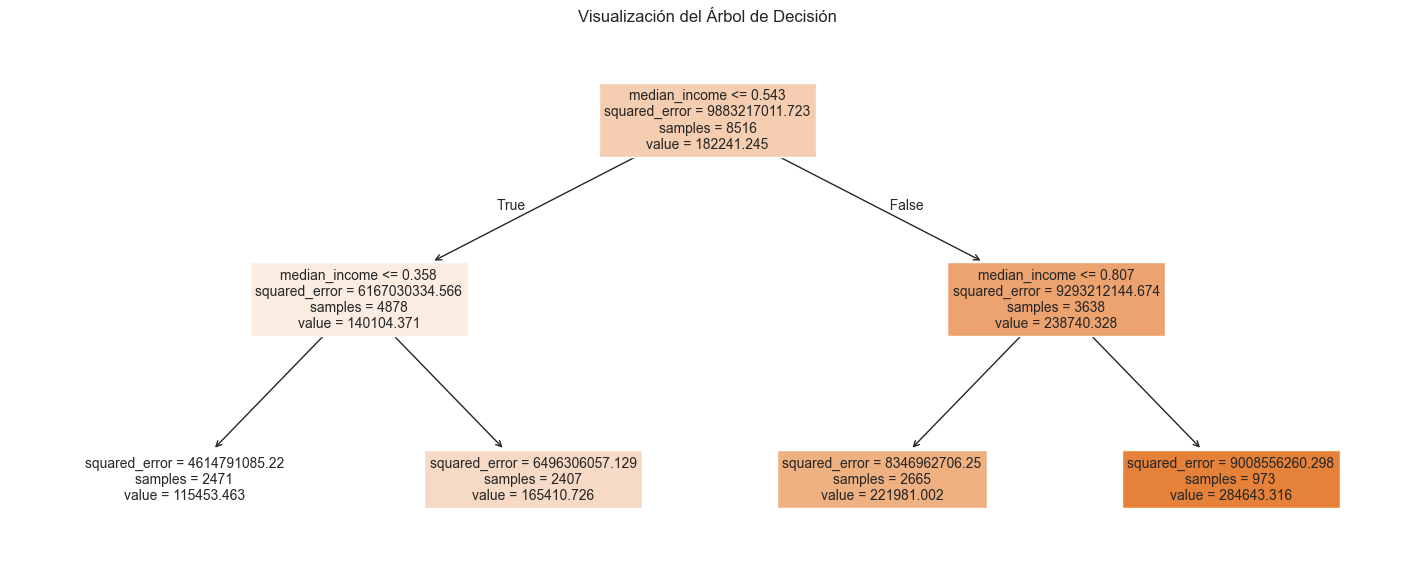

In [64]:
plt.figure(figsize=(18, 7))
plot_tree(tree_mod, filled=True, feature_names=['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income'], fontsize=10,class_names=True)
plt.title('Visualización del Árbol de Decisión')
plt.show()

### SVM

In [65]:
from sklearn.svm import SVR

In [66]:
model = SVR()

In [67]:
model.fit(X_train, y_train)

SVR()

In [68]:
preds = model.predict(X_test)

In [69]:
reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : -0.030148645569980204
Mean Squared Error     : 9857451000.529018
Mean Absolute Error    : 74102.0760963711
Root Mean Squared Error: 99284.69670865203


In [70]:
model = SVR(C=0.1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [71]:
reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : -0.035558657745957456
Mean Squared Error     : 9909219189.679482
Mean Absolute Error    : 74301.66495987367
Root Mean Squared Error: 99545.06110139006


In [72]:
model = SVR(kernel='sigmoid')
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : -0.03603756767378097
Mean Squared Error     : 9913801859.537361
Mean Absolute Error    : 74327.99002821132
Root Mean Squared Error: 99568.07650817285


In [ ]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

[LibSVM]R2 Score               : 0.3563182083962366
Mean Squared Error     : 6159365202.2481785
Mean Absolute Error    : 55712.780218255386
Root Mean Squared Error: 78481.62334106104


### Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
preds = model.predict(X_test)

In [77]:
reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.5251372145957878
Mean Squared Error     : 4543942914.672078
Mean Absolute Error    : 48427.37828493151
Root Mean Squared Error: 67408.7747602052


In [79]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.5313612391979288
Mean Squared Error     : 4484385473.320741
Mean Absolute Error    : 48044.66191917808
Root Mean Squared Error: 66965.55437925337


In [80]:
model = RandomForestRegressor(max_depth=5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.44666286688724377
Mean Squared Error     : 5294860794.981904
Mean Absolute Error    : 53270.17488339826
Root Mean Squared Error: 72765.7941273364


### XGBoost

In [85]:
from xgboost import XGBRegressor

In [86]:
model = XGBRegressor()

In [87]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
preds = model.predict(X_test)

In [89]:
reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.5028678351472036
Mean Squared Error     : 4757037711.884713
Mean Absolute Error    : 49878.0843942637
Root Mean Squared Error: 68971.2817909361


In [90]:
model = XGBRegressor(n_estimators=30)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.5256263542741354
Mean Squared Error     : 4539262356.742441
Mean Absolute Error    : 48494.44755458048
Root Mean Squared Error: 67374.04809526025


In [91]:
model = XGBRegressor(max_depth=3)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.5406073430382872
Mean Squared Error     : 4395909877.158882
Mean Absolute Error    : 48490.979223565926
Root Mean Squared Error: 66301.65817804923


In [92]:
model = XGBRegressor(learning_rate=0.001)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.079080755916899
Mean Squared Error     : 8812239246.279442
Mean Absolute Error    : 72609.33163099315
Root Mean Squared Error: 93873.52793135795


In [93]:
model = XGBRegressor(learning_rate=0.1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.540436526823662
Mean Squared Error     : 4397544410.65364
Mean Absolute Error    : 48038.76761344178
Root Mean Squared Error: 66313.98352273554


In [94]:
model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=30)
model.fit(X_train, y_train)
preds = model.predict(X_test)

reg_score=r2_score(y_test, preds)
print(f'R2 Score               : {reg_score}')
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error     : {mse}')
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error    : {mae}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

R2 Score               : 0.46022686843236105
Mean Squared Error     : 5165067409.1661
Mean Absolute Error    : 52889.14677440069
Root Mean Squared Error: 71868.40341322534


### Optimización de Modelos

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

folds = 10

scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

xgb_model = XGBRegressor()
xgb=cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)

In [99]:
pd.DataFrame(xgb).sort_values(by='test_r2')

fit_time  score_time   test_r2      test_mse      test_mae
1  0.358998    0.008000 -1.215238  4.534302e+09  53366.144929
6  0.321003    0.007997 -0.246610  4.925189e+09  51615.913722
8  0.247004    0.005993  0.175124  8.147408e+09  67408.535310
0  0.712995    0.008005  0.197490  4.532198e+09  49981.351399
5  0.261000    0.006996  0.315900  5.306212e+09  53241.573291
9  0.224000    0.006999  0.341943  3.898597e+09  46516.415797
3  0.264998    0.007001  0.357633  3.405210e+09  41087.178163
7  0.230001    0.010001  0.439937  6.832913e+09  60833.875292
2  0.287000    0.008999  0.488424  5.985816e+09  54078.188928
4  0.266003    0.008001  0.537786  5.308605e+09  52521.577791

In [100]:
rf_model = RandomForestRegressor()
rf=cross_validate(rf_model, X, y, cv=folds, scoring=scoring)
pd.DataFrame(rf).sort_values(by='test_r2')

fit_time  score_time   test_r2      test_mse      test_mae
1  12.454850    0.056007 -1.200637  4.504415e+09  53866.917765
6  12.474659    0.064929 -0.166206  4.607524e+09  51185.069391
8  12.496950    0.057999  0.197005  7.931281e+09  66482.543980
0  12.540882    0.063000  0.288446  4.018520e+09  46687.515267
5  12.425599    0.061140  0.300464  5.425936e+09  51623.511052
9  12.427875    0.057072  0.344099  3.885823e+09  46374.489687
3  12.558189    0.062053  0.407154  3.142698e+09  38931.232671
7  12.428451    0.064855  0.445408  6.766169e+09  60466.623586
2  12.557082    0.060930  0.481127  6.071197e+09  53643.879491
4  12.535193    0.064061  0.518887  5.525662e+09  53279.362366

In [101]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tru

In [ ]:
# param_grid = {
#    'bootstrap': [True],
#    'n_estimators': [100, 200, 300, 1000],
#    'max_depth': [80, 90, 100,110],
#    'max_features': [2,3],
#    'min_samples_split': [8, 10, 12],
#    'min_samples_leaf': [3, 4, 5]
#}
# Esto demanda mucho tiempo de cómputo, por lo que no se ejecuta.

In [108]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5],
    'max_features': [2,3],
}

In [109]:
from sklearn.model_selection import ParameterGrid

for param in ParameterGrid(param_grid):
    print(param)
   # rf_model = RandomForestRegressor(**param)
   # rf=cross_validate(rf_model, X, y, cv=folds, scoring=scoring)
   # print(f'Params: {param} - R2: {rf["test_r2"].mean():.4f}, MSE: {rf["test_mse"].mean():.4f}, MAE: {rf["test_mae"].mean():.4f}')

{'max_depth': 3, 'max_features': 2, 'n_estimators': 100}
{'max_depth': 3, 'max_features': 2, 'n_estimators': 200}
{'max_depth': 3, 'max_features': 2, 'n_estimators': 300}
{'max_depth': 3, 'max_features': 3, 'n_estimators': 100}
{'max_depth': 3, 'max_features': 3, 'n_estimators': 200}
{'max_depth': 3, 'max_features': 3, 'n_estimators': 300}
{'max_depth': 5, 'max_features': 2, 'n_estimators': 100}
{'max_depth': 5, 'max_features': 2, 'n_estimators': 200}
{'max_depth': 5, 'max_features': 2, 'n_estimators': 300}
{'max_depth': 5, 'max_features': 3, 'n_estimators': 100}
{'max_depth': 5, 'max_features': 3, 'n_estimators': 200}
{'max_depth': 5, 'max_features': 3, 'n_estimators': 300}


In [110]:
len(ParameterGrid(param_grid))

12

In [111]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=0)

cv=GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3)
cv.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 5], 'max_features': [2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [115]:
resultados = pd.DataFrame(cv.cv_results_)
resultados.sort_values(by='mean_test_score', ascending=False)
print(f'Best parameters: {cv.best_params_}')
resultados[['params','mean_test_score', 'std_test_score', 'rank_test_score']]

Best parameters: {'max_depth': 5, 'max_features': 3, 'n_estimators': 300}


params  mean_test_score  \
0   {'max_depth': 3, 'max_features': 2, 'n_estimat...         0.278735   
1   {'max_depth': 3, 'max_features': 2, 'n_estimat...         0.279082   
2   {'max_depth': 3, 'max_features': 2, 'n_estimat...         0.279067   
3   {'max_depth': 3, 'max_features': 3, 'n_estimat...         0.324444   
4   {'max_depth': 3, 'max_features': 3, 'n_estimat...         0.325475   
5   {'max_depth': 3, 'max_features': 3, 'n_estimat...         0.325178   
6   {'max_depth': 5, 'max_features': 2, 'n_estimat...         0.374391   
7   {'max_depth': 5, 'max_features': 2, 'n_estimat...         0.376444   
8   {'max_depth': 5, 'max_features': 2, 'n_estimat...         0.376614   
9   {'max_depth': 5, 'max_features': 3, 'n_estimat...         0.395461   
10  {'max_depth': 5, 'max_features': 3, 'n_estimat...         0.395858   
11  {'max_depth': 5, 'max_features': 3, 'n_estimat...         0.396386   

    std_test_score  rank_test_score  
0         0.000571               12  
1         0.002734               10  
2         0.002989               11  
3         0.015160                9  
4         0.015182                7  
5         0.015577                8  
6         0.011499                6  
7         0.011171                5  
8         0.011674                4  
9         0.019653                3  
10        0.019751                2  
11        0.019843                1

In [116]:
best_model = cv.best_estimator_

In [117]:
best_model

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=300,
                      random_state=0)

In [118]:
model=XGBRegressor()

cv=GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3)
cv.fit(X,y)

c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\t

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 5], 'max_features': [2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [119]:
resultados = pd.DataFrame(cv.cv_results_)
resultados[['params','mean_test_score', 'std_test_score', 'rank_test_score']]

params  mean_test_score  \
0   {'max_depth': 3, 'max_features': 2, 'n_estimat...         0.492434   
1   {'max_depth': 3, 'max_features': 2, 'n_estimat...         0.484298   
2   {'max_depth': 3, 'max_features': 2, 'n_estimat...         0.474339   
3   {'max_depth': 3, 'max_features': 3, 'n_estimat...         0.492434   
4   {'max_depth': 3, 'max_features': 3, 'n_estimat...         0.484298   
5   {'max_depth': 3, 'max_features': 3, 'n_estimat...         0.474339   
6   {'max_depth': 5, 'max_features': 2, 'n_estimat...         0.466661   
7   {'max_depth': 5, 'max_features': 2, 'n_estimat...         0.439669   
8   {'max_depth': 5, 'max_features': 2, 'n_estimat...         0.425761   
9   {'max_depth': 5, 'max_features': 3, 'n_estimat...         0.466661   
10  {'max_depth': 5, 'max_features': 3, 'n_estimat...         0.439669   
11  {'max_depth': 5, 'max_features': 3, 'n_estimat...         0.425761   

    std_test_score  rank_test_score  
0         0.020725                1  
1         0.019288                3  
2         0.018193                5  
3         0.020725                1  
4         0.019288                3  
5         0.018193                5  
6         0.010319                7  
7         0.013947                9  
8         0.013169               11  
9         0.010319                7  
10        0.013947                9  
11        0.013169               11

In [120]:
cv.best_params_

{'max_depth': 3, 'max_features': 2, 'n_estimators': 100}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

param_random = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5],
    'max_features': [2,3],
}

model = RandomForestRegressor(random_state=0)
cv = RandomizedSearchCV(estimator=model, param_distributions=param_random, cv=3, n_iter=5, random_state=0)
cv.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=5,
                   param_distributions={'max_depth': [3, 5],
                                        'max_features': [2, 3],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0)

In [122]:
resultados = pd.DataFrame(cv.cv_results_)
resultados[['params','mean_test_score', 'std_test_score', 'rank_test_score']]

params  mean_test_score  \
0  {'n_estimators': 100, 'max_features': 2, 'max_...         0.374391   
1  {'n_estimators': 300, 'max_features': 3, 'max_...         0.396386   
2  {'n_estimators': 200, 'max_features': 3, 'max_...         0.325475   
3  {'n_estimators': 200, 'max_features': 3, 'max_...         0.395858   
4  {'n_estimators': 300, 'max_features': 2, 'max_...         0.279067   

   std_test_score  rank_test_score  
0        0.011499                3  
1        0.019843                1  
2        0.015182                4  
3        0.019751                2  
4        0.002989                5

In [123]:
cv.best_estimator_

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=300,
                      random_state=0)

In [124]:
cv.best_params_

{'n_estimators': 300, 'max_features': 3, 'max_depth': 5}